# Principal component analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

C:\Users\shant\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = np.loadtxt("pca_data.txt")

In [3]:
mean = np.mean(data, axis=0)
data_centered = data - mean
std = np.std(data_centered, axis=0)
data_standardized = data_centered / std

In [4]:
cov_matrix = np.cov(data_standardized.T)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [6]:
projection_matrix = eigenvectors[:, :2]
projected_data = np.dot(data_standardized, projection_matrix)

# Scatter Plot

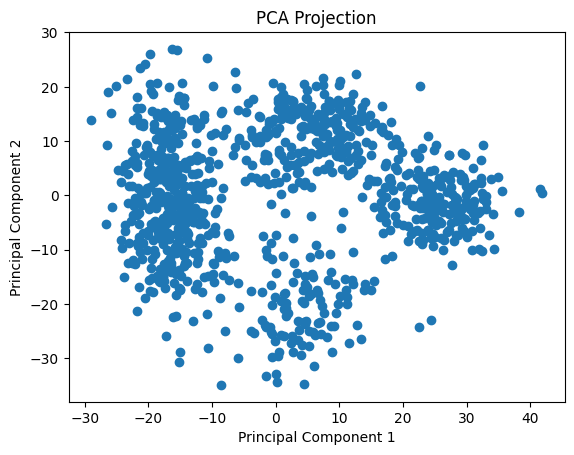

In [7]:
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [8]:
import umap.umap_ as umap

# Umap plot

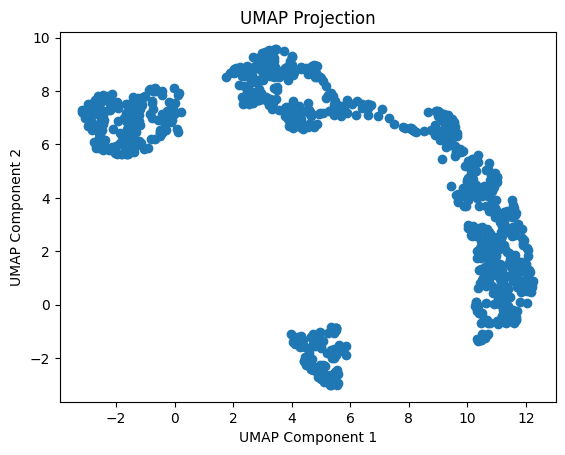

In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_standardized)
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title("UMAP Projection")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

# t-SNE plot

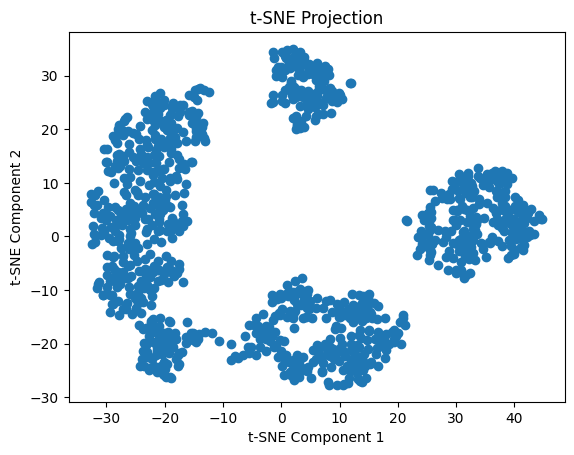

In [10]:
tsne = TSNE(n_components=2)
embedding = tsne.fit_transform(data_standardized)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()



# Expectation-maximization (EM) Algorithm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson

In [12]:

def em_algorithm(data, max_iter=1000, tol=1e-6, cluster=2):
    n = len(data)
    miu = np.random.uniform(1, 10, cluster)
    weight = np.random.uniform(0, 1, cluster)
    weight = weight / weight.sum()  

    prev_log_likelihood = 0

    
    for i in range(max_iter):
        # E-step
        prob = np.zeros((n, cluster))
        for j in range(cluster):
            prob[:, j] = poisson.pmf(data, miu[j])
        prob = prob * weight


        prob = prob / prob.sum(axis=1)[:, None]

        # M-step
        miu_new = np.zeros(cluster)
        weight_new = np.zeros(cluster)
        for j in range(cluster):
            n_j = prob[:, j].sum()
            miu_new[j] = np.dot(data, prob[:, j]) / n_j
            weight_new[j] = n_j / n


        # Check for convergence
        log_likelihood = np.log(np.dot(prob, weight)).sum()
        if np.abs(log_likelihood - prev_log_likelihood) < tol:
            print(f'Converged after {i} iterations')
            break
        prev_log_likelihood = log_likelihood

        miu = miu_new
        weight = weight_new


    return miu, weight

In [13]:
data = np.loadtxt('em_data.txt')

miu, weight = em_algorithm(data, cluster=2)

print('Mean number of children in families with family planning: ', miu[0])
print('Mean number of children in families without family planning: ', miu[1])

print('Proportion of families with family planning: ', weight[0])
print('Proportion of families without family planning: ', weight[1])

Converged after 299 iterations
Mean number of children in families with family planning:  1.782374548522863
Mean number of children in families without family planning:  4.910690671780889
Proportion of families with family planning:  0.3560032387714772
Proportion of families without family planning:  0.6439967612285227
